# 5.1 什么是机器学习

## 5.1.1 机器学习的分类

## 5.1.2 机器学习应用的定性示例

## 5.1.3 小结

有监督学习：
- 分类
- 回复

无监督学习：
- 聚类
- 降维

# 5.2 Scikit-Learn简介

## 5.2.1 Scikit-Learn的数据表示

1. 数据表

In [3]:
import seaborn as sns

d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. 特征矩阵

3. 目标数组

知道目标数组之后，就可以用Seaborn对数据进行可视化

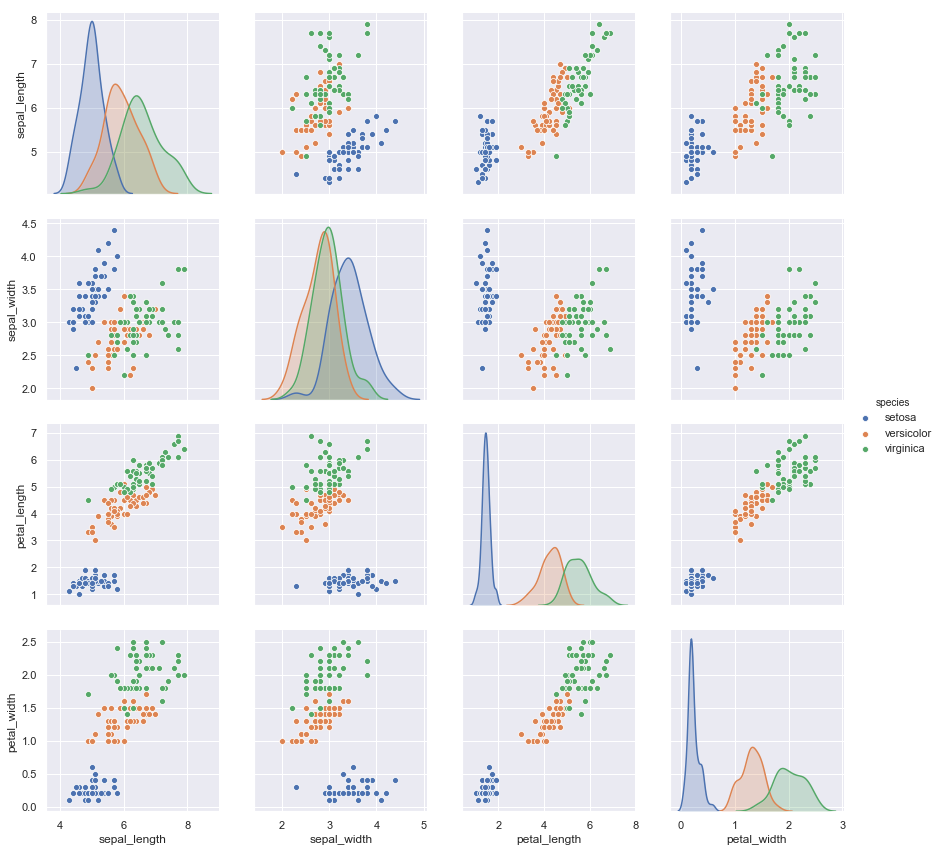

In [6]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.pairplot(iris, hue='species', height=3)

In [7]:
x_iris = iris.drop('species', axis=1)

In [8]:
x_iris.shape

(150, 4)

In [9]:
y_iris = iris['species']

In [10]:
y_iris.shape

(150,)

## 5.2.2 Scikit-Learn的评估器API

1. API基础知识

2. 有监督学习示例：简单线性回归

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
rng = np.random.RandomState(42)

In [13]:
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

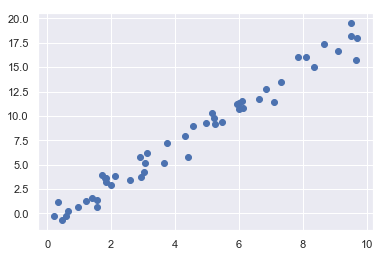

In [14]:
plt.scatter(x, y)

（1） 选择模型类

In [15]:
from sklearn.linear_model import LinearRegression

（2） 选择模型超参数

实例化LinearRegression类并用fit_intercept超参数设置是否想要拟合直线的截距

In [16]:
model = LinearRegression(fit_intercept=True)

In [17]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

（3） 将数据整理成特征矩阵和目标数组

In [18]:
X = x[:, np.newaxis]

In [19]:
X.shape

(50, 1)

（4） 用模型拟合数据

In [20]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

模型参数如下：

In [21]:
model.coef_

array([1.9776566])

In [22]:
model.intercept_

-0.903310725531111

（5） 预测新数据的标签

In [23]:
xfit = np.linspace(-1, 11)

In [24]:
xfit = xfit[:, np.newaxis]

In [25]:
yfit = model.predict(xfit)

In [26]:
yfit

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106,
       -0.459347  ,  0.02497707,  0.50930113,  0.9936252 ,  1.47794926,
        1.96227333,  2.44659739,  2.93092146,  3.41524552,  3.89956959,
        4.38389366,  4.86821772,  5.35254179,  5.83686585,  6.32118992,
        6.80551398,  7.28983805,  7.77416211,  8.25848618,  8.74281024,
        9.22713431,  9.71145837, 10.19578244, 10.68010651, 11.16443057,
       11.64875464, 12.1330787 , 12.61740277, 13.10172683, 13.5860509 ,
       14.07037496, 14.55469903, 15.03902309, 15.52334716, 16.00767122,
       16.49199529, 16.97631936, 17.46064342, 17.94496749, 18.42929155,
       18.91361562, 19.39793968, 19.88226375, 20.36658781, 20.85091188])

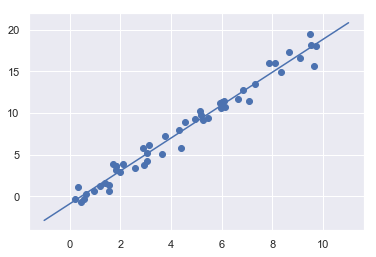

In [27]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

3. 有监督学习示例：鸢尾花数据分类

高斯朴素贝叶斯方法速度很快，而且不需要选择超参数，所以通常很合适作为初步分类手段，在借助更复杂的模型进行优化之前使用。

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x_iris, y_iris, random_state=1)

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
model = GaussianNB()

In [32]:
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
y_model = model.predict(xtest)

最后用accuracy_score工具验证模型预测结果的准确率

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(ytest, y_model)

0.9736842105263158

4. 无监督学习示例：鸢尾花数据降维

使用主成分分析降维

In [37]:
from sklearn.decomposition import PCA

In [38]:
model = PCA(n_components=2)

In [39]:
model.fit(x_iris)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
x_2d = model.transform(x_iris)

先将二维数据插入到鸢尾花的DataFrame中，然后用Seaborn的lmplot的方法画图

In [41]:
iris['PCA1'] = x_2d[:, 0]
iris['PCA2'] = x_2d[:, 1]

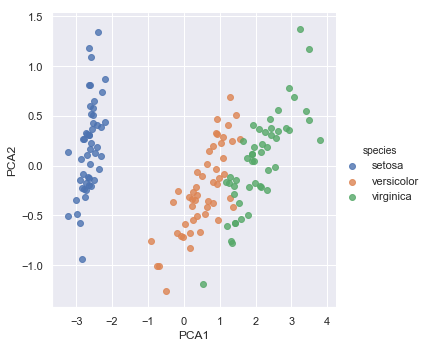

In [44]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

5. 无监督学习示例：鸢尾花数据聚类

使用一个强大的聚类方法，高斯混合模型。

In [46]:
from sklearn.mixture import GaussianMixture

In [47]:
model = GaussianMixture(n_components=3, covariance_type='full')

In [48]:
model.fit(x_iris)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [49]:
y_gmm = model.predict(x_iris)

跟之前一样，将簇标签添加到鸢尾花的DataFrame中，然后用Seaborn画出结果

In [50]:
iris['cluster'] = y_gmm

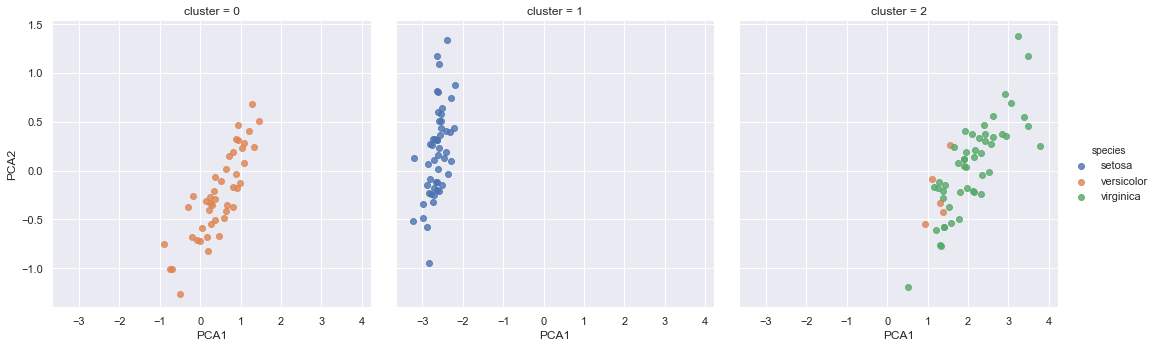

In [51]:
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

## 5.2.3 应用：手写数字探索

1. 加载并可视化手写数字

In [52]:
from sklearn.datasets import load_digits

In [54]:
digits = load_digits()

In [55]:
digits.images.shape

(1797, 8, 8)

对前100张图进行可视化

In [57]:
import matplotlib.pyplot as plt

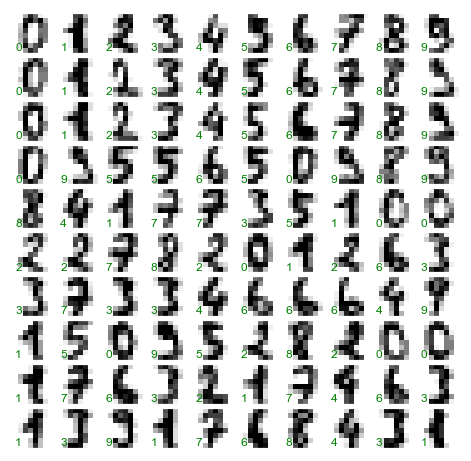

In [59]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [60]:
x = digits.data

In [61]:
x.shape

(1797, 64)

In [62]:
y = digits.target

In [63]:
y.shape

(1797,)

2. 无监督学习：降维

流行学习算法中的Isomap算法对数据进行降维

In [64]:
from sklearn.manifold import Isomap

In [65]:
iso = Isomap(n_components=2)

In [66]:
iso.fit(digits.data)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=None,
       n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In [67]:
data_projected = iso.transform(digits.data)

In [68]:
data_projected.shape

(1797, 2)

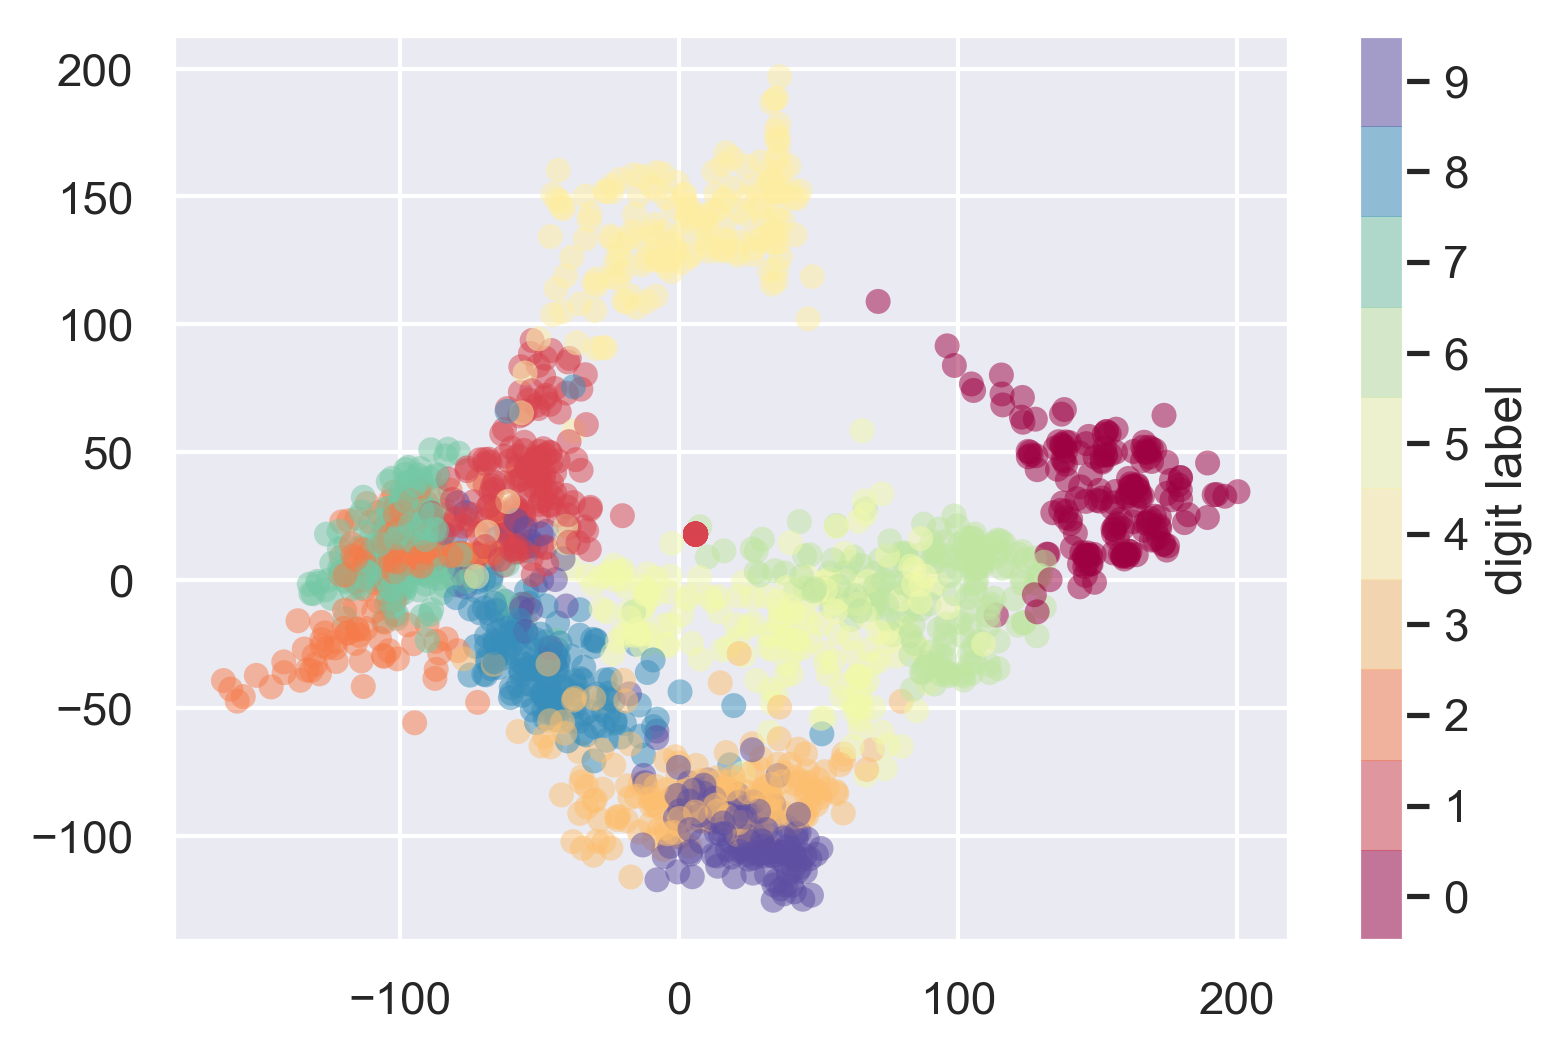

In [72]:
plt.figure(dpi=300)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

3. 数字分类

In [73]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=0)

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
model = GaussianNB()

In [76]:
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [77]:
y_model=model.predict(xtest)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(ytest, y_model)

0.8333333333333334

我们需要知道模型哪里做得不够好，解决这个问题的办法就是使用混淆矩阵（confusion matrix）

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
mat = confusion_matrix(ytest, y_model)

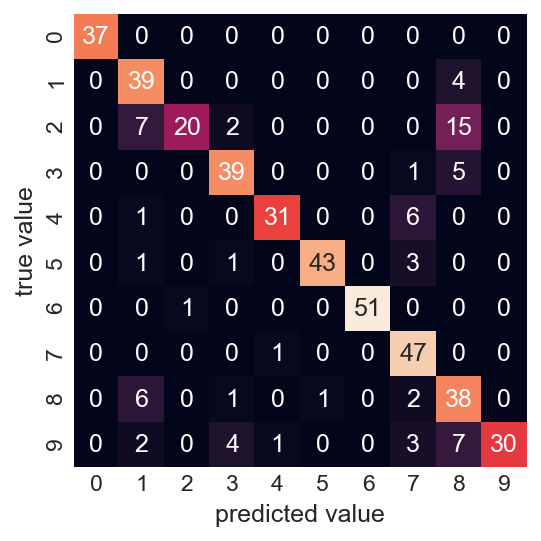

In [94]:
fig, ax = plt.subplots(dpi=150)
with sns.axes_style('white'):
    sns.heatmap(mat, square=True, annot=True, cbar=False, ax=ax)
    plt.xlabel('predicted value')
    plt.ylabel('true value')

另一种显示模型特征的直观方式是将样本画出来，然后把预测出标签放在左下角，用绿色表示预测正确，用红色表示预测错误

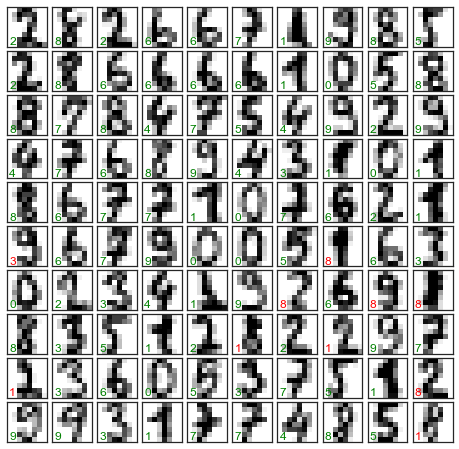

In [98]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')

# 5.3 超参数与模型验证

## 5.3.1 什么是模型验证

模型验证：在选择模型和超参数之后，通过对训练数据进行学习，对比模型对一致数据的预测值与实际值的差异。

1. 错误的模型验证方法

In [99]:
from sklearn.datasets import load_iris

In [100]:
iris = load_iris()

In [101]:
x = iris.data
y = iris.target

选择模型和超参数

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
model = KNeighborsClassifier(n_neighbors=1)

In [104]:
model.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [105]:
y_model = model.predict(x)

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
accuracy_score(y, y_model)

1.0

这样计算正确率是错误的，它用同一套数据训练和评估模型。

2. 模型验证的正确方法：留出集

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
# 每个数据集分一半数据
x1, x2, y1, y2 = train_test_split(x, y, random_state=0, train_size=0.5)

In [110]:
# 用模型拟合训练数据
model.fit(x1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [111]:
# 在测试机中评估模型准确率
y2_model = model.predict(x2)

In [112]:
accuracy_score(y2, y2_model)

0.9066666666666666

3. 交叉验证

In [113]:
y2_model = model.fit(x1, y1).predict(x2)

In [114]:
y1_model = model.fit(x2, y2).predict(x1)

In [115]:
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

用cross_val_score实现多折交叉验证

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
cross_val_score(model, x, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

每次只有一个样本做测试，其他样本全部用于训练。这种交叉验证类型叫做LOO，Leave-one-out

In [118]:
from sklearn.model_selection import LeaveOneOut

In [120]:
scores = cross_val_score(model, x, y, cv=LeaveOneOut())

In [121]:
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [122]:
len(scores)

150

In [123]:
scores.mean()

0.96

## 5.3.2 选择最优模型

1. 偏差与方差的均衡

欠拟合：高偏差

过拟合：高方差

R$^2$：判定系数 Coefficient of determination，用来衡量模型与目标均值的对比结果。

R$^2$ = 1：表示模型与数据完全吻合。

R$^2$ = 0：表示模型不比简单取均值好。

R$^2$ < 0：表示模型性能很差。

一般性结论：
- 对于高偏差（欠拟合）模型，模型在验证集的表现与在训练集的表现类似。
- 对于高方差（过拟合）模型，模型在验证集的表现远远不如在训练集的表现。

2. Scikit-Learn验证曲线

为了得到任意次数的多项式，可以用一个带多项式预处理器的简单线性回归模型实现。

In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.pipeline import make_pipeline

In [17]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs)) 

In [5]:
import numpy as np

In [7]:
def make_data(N, err=1.0, rseed=1):
    # 随机抽样数据
    rng = np.random.RandomState(rseed)
    x = rng.rand(N, 1) ** 2
    y = 10 - 1. / (x.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return x, y

In [8]:
x, y = make_data(40)

In [10]:
y

array([ 7.24998644,  7.70041705, -0.12288892,  3.83970623,  1.50418461,
        1.31600899,  1.88404109,  5.0456151 ,  5.42819209,  6.59281674,
        5.70193919,  8.23148858,  1.8305394 ,  9.086429  ,  1.73425177,
        8.92229631,  6.16043712,  6.68597765,  0.8992155 ,  4.51082693,
        8.70162943,  8.39917725,  5.14639037, 10.37406543,  8.96816213,
        9.50648826,  0.9746409 , -0.20201375,  1.09605993,  8.50272859,
        0.67301646,  6.98083184,  9.856233  ,  8.32873282,  8.55755817,
        5.87386864,  7.49515774,  9.997533  ,  0.54626444,  8.1929663 ])

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [13]:
x_test = np.linspace(-0.1, 1.1, 500)[:, None]

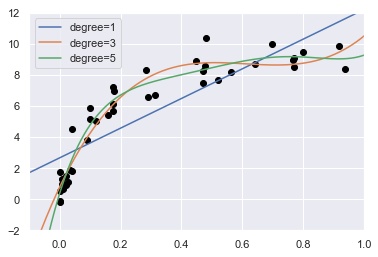

In [18]:
plt.scatter(x.ravel(), y, color='black')

axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(x, y).predict(x_test)
    plt.plot(x_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

利用Scikit-Learn的validation_curve函数进行调参
- 只要提供模型、数据、参数名称和验证范围信息，函数就会自动计算验证范围内的训练得分和验证得分

In [20]:
from sklearn.model_selection import validation_curve

In [21]:
degree = np.arange(0, 21)

In [26]:
train_score, val_score = validation_curve(PolynomialRegression(), x, y, 'polynomialfeatures__degree', degree, cv=7)

In [30]:
train_score

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.72060505, 0.73235327, 0.71615237, 0.75517775, 0.6979951 ,
        0.74351307, 0.71104367],
       [0.8966661 , 0.89427274, 0.88460403, 0.90482859, 0.87685741,
        0.90106431, 0.90420325],
       [0.92830604, 0.93586649, 0.93273606, 0.95501615, 0.91919623,
        0.92673491, 0.9402878 ],
       [0.9386132 , 0.94947024, 0.94775706, 0.9632512 , 0.93425141,
        0.94148127, 0.94641559],
       [0.94121068, 0.94988755, 0.94891078, 0.9637873 , 0.93481636,
        0.94464031, 0.94706837],
       [0.94280027, 0.95011515, 0.95028793, 0.96555698, 0.93622172,
        0.94504929, 0.94928043],
       [0.94465044, 0.95166164, 0.95034312, 0.96584535, 0.93731514,
        0.94571392, 0.95274503],
       [0.94465097, 0.95169173, 0.95126473, 0.96709791, 0.93735454,
        0.9484231 , 0.95274521],
       [0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
        0.9490145 , 0.9

7折交叉验证，每一折的准确率

In [31]:
len(train_score)

21

Text(0,0.5,'score')

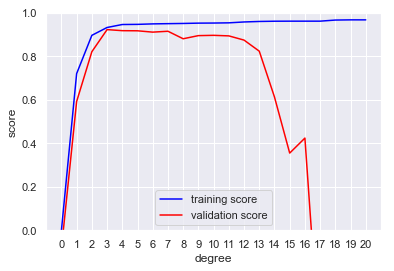

In [35]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('score')

从验证曲线可以看出，偏差与方差均衡性最好的是三次多项式，我们可以计算结果，并将模型画在原始数据上

## 5.3.3 学习曲线

In [45]:
x2, y2 = make_data(200)

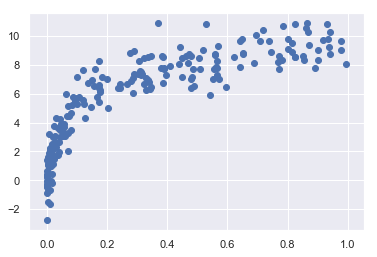

In [46]:
plt.scatter(x2.ravel(), y2)

In [47]:
degree = np.arange(21)

In [48]:
train_score2, val_score2 = validation_curve(PolynomialRegression(), x2, y2, 'polynomialfeatures__degree', degree, cv=7)

Text(0,0.5,'score')

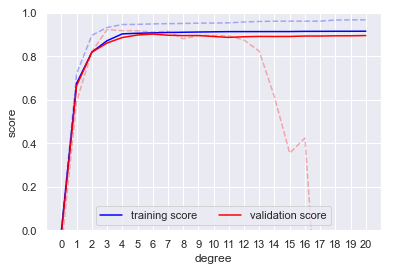

In [54]:
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='lower center', ncol=2)
plt.xticks(degree)
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

两个影响模型的因素：模型复杂度；训练数据集的规模。

反映训**练集规模**的训练得分 / 验证得分曲线被称为学习曲线。

**Scikit-Learn学习曲线**

In [56]:
from sklearn.model_selection import learning_curve

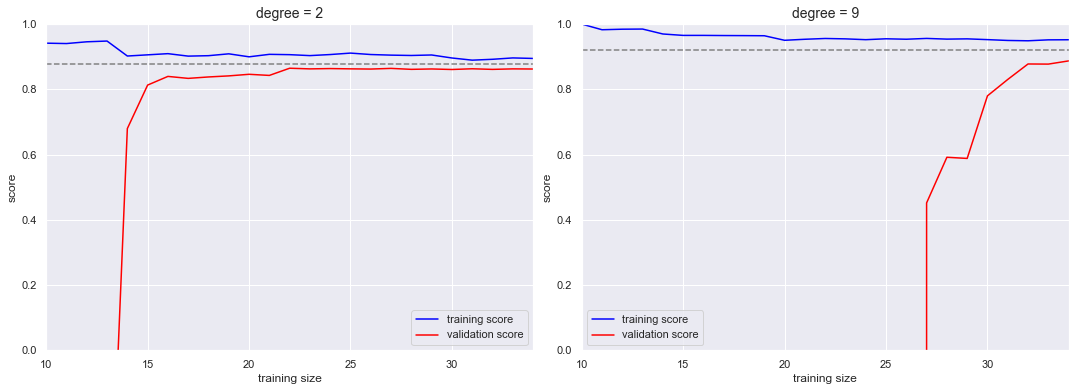

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), x, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

提高收敛得分的唯一办法就是**换模型**（通常也是更复杂的模型）。

In [62]:
N[0]

10

In [64]:
N[-1]

34

In [66]:
x.shape

(40, 1)

In [69]:
train_lc[-1]

array([0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
       0.94828235, 0.95163327])

In [70]:
val_lc[-1]

array([0.92096749, 0.81695135, 0.90496397, 0.80149852, 0.97568253,
       0.91258214, 0.87726809])

In [76]:
np.concatenate([train_lc[-1], val_lc[-1]])

array([0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
       0.94828235, 0.95163327, 0.92096749, 0.81695135, 0.90496397,
       0.80149852, 0.97568253, 0.91258214, 0.87726809])

In [77]:
np.mean(np.concatenate([train_lc[-1], val_lc[-1]]))

0.9195510519950337

In [79]:
np.mean([train_lc[-1], val_lc[-1]])

0.9195510519950337

In [80]:
[train_lc[-1], val_lc[-1]]

[array([0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
        0.94828235, 0.95163327]),
 array([0.92096749, 0.81695135, 0.90496397, 0.80149852, 0.97568253,
        0.91258214, 0.87726809])]

np.mean如果没有指定轴的话，是取所有数据的均值

In [82]:
np.mean(val_lc, 1)

array([-1.66220646e+15, -8.64123281e+13, -2.97558304e+10, -2.83612286e+10,
       -7.96652382e+08, -3.78447425e+08, -1.16780197e+05, -8.89665546e+04,
       -3.82673409e+05, -3.57306076e+05, -2.20641855e+06, -2.07463241e+04,
       -6.95955218e+02, -5.75533162e+02, -1.63495871e+03, -1.38170588e+03,
       -1.15338370e+03,  4.51754100e-01,  5.91680987e-01,  5.88134006e-01,
        7.79999944e-01,  8.30259907e-01,  8.77705732e-01,  8.77322761e-01,
        8.87130583e-01])

通过求均值获得的收敛最终精度

## 5.3.4 验证实践：网格搜索

In [83]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grid = {
    'polynomialfeatures__degree': np.arange(21),
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False]
}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [87]:
grid.fit(x, y)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [90]:
model = grid.best_estimator_

d:\python35\lib\site-packages\matplotlib\pyplot.py:3361: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

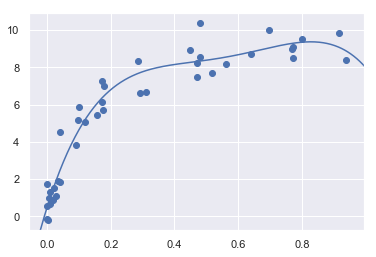

In [91]:
plt.scatter(x.ravel(), y)
lim = plt.axis()
y_test = model.fit(x, y).predict(x_test)
plt.plot(x_test.ravel(), y_test, hold=True);
plt.axis(lim)